<a href="https://colab.research.google.com/github/Shruti-Elango/DS3001.programming/blob/Finished-Assignments/shruti_elango_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

In [19]:
print( 'Questions completed 1 and 4')
print('Shruti Elango (se2ezr)')

Questions completed 1 and 4
Shruti Elango (se2ezr)


In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [21]:
# load data
cars = pd.read_csv('/content/cars_hw.csv')

In [22]:
cars.dtypes

Unnamed: 0            int64
Make                 object
Make_Year             int64
Color                object
Body_Type            object
Mileage_Run           int64
No_of_Owners         object
Seating_Capacity      int64
Fuel_Type            object
Transmission         object
Transmission_Type    object
Price                 int64
dtype: object

In [23]:
cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [24]:
cars.isnull().sum()

Unnamed: 0           0
Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity     0
Fuel_Type            0
Transmission         0
Transmission_Type    0
Price                0
dtype: int64

In [25]:
cars.shape

(976, 12)

In [26]:
cars['Price'].describe()

count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64

<Axes: xlabel='Age', ylabel='Price'>

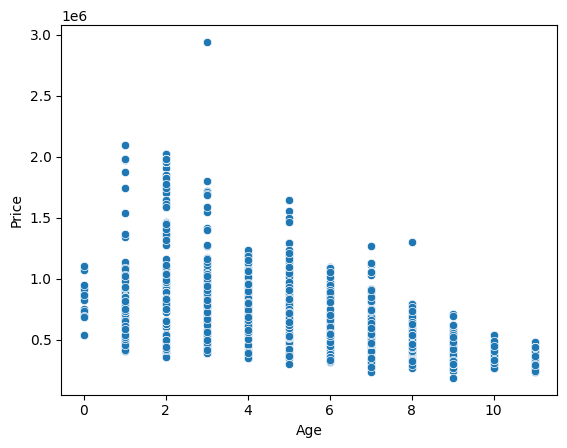

In [27]:
cars['Age'] = max(cars['Make_Year'])-cars['Make_Year'] # Convert year to age
sns.scatterplot(data=cars, y='Price', x='Age')

<Axes: xlabel='age_ihs', ylabel='price_ihs'>

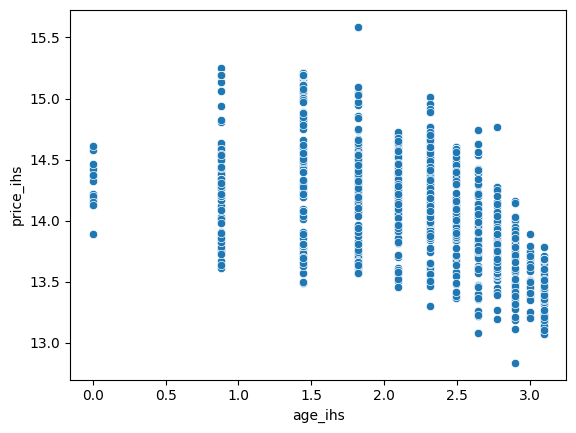

In [28]:
# Take arcsinh transformation to rescale the variables
cars['price_ihs'] = np.arcsinh(cars['Price'])
cars['age_ihs'] = np.arcsinh(cars['Age'])
sns.scatterplot(data=cars,y='price_ihs',x='age_ihs') # We've got some outliers here

<Axes: >

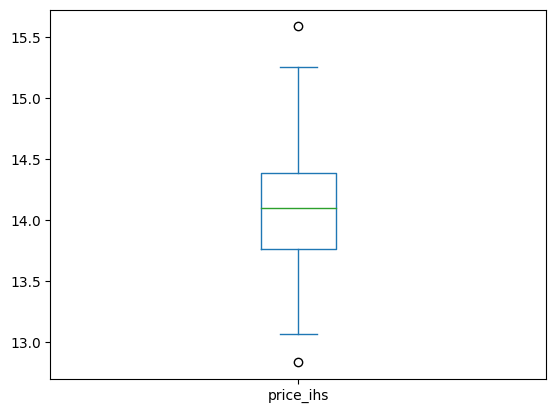

In [29]:
# outliers
cars['price_ihs'].plot.box()

<Axes: >

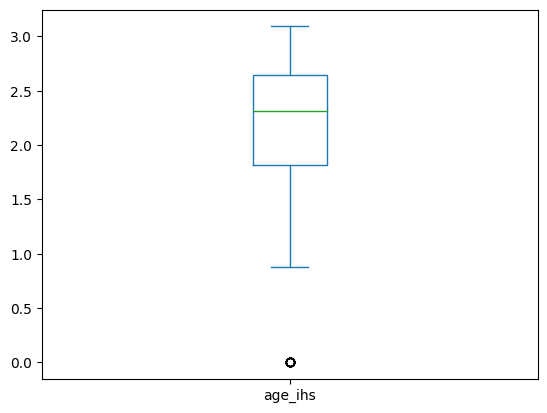

In [30]:
#  outliers
cars['age_ihs'].plot.box()

<Axes: xlabel='age_ihs', ylabel='price_ihs'>

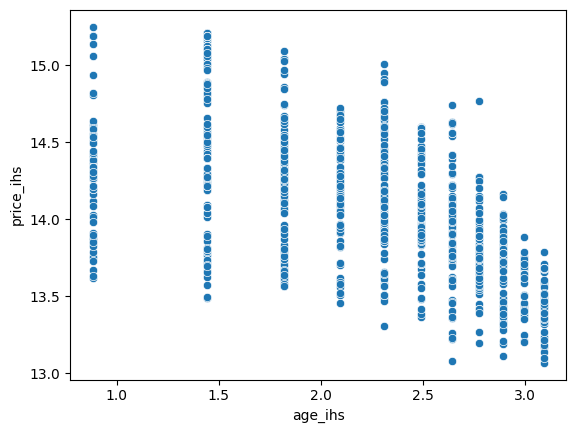

In [31]:

cars = cars.loc[cars['price_ihs']>13,:]
cars = cars.loc[cars['price_ihs']<15.5,:]
cars = cars.loc[cars['age_ihs']>0,:]
sns.scatterplot(data=cars,y='price_ihs',x='age_ihs')

In [32]:
cars['price_ihs'].describe()

count    960.000000
mean      14.101029
std        0.448406
min       13.068963
25%       13.757351
50%       14.095412
75%       14.383378
max       15.250595
Name: price_ihs, dtype: float64

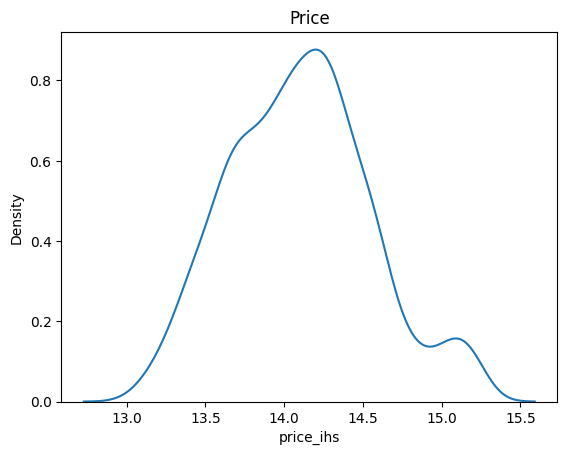

In [33]:
sns.kdeplot(cars['price_ihs'])
plt.title('Price')
plt.show()

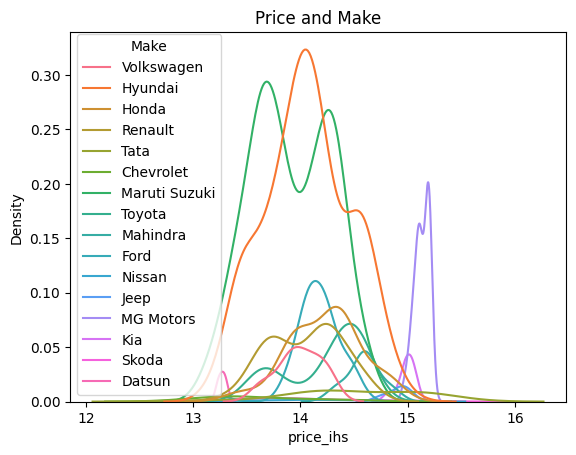

In [34]:
sns.kdeplot(data=cars, x='price_ihs', hue='Make')
plt.title('Price and Make')
plt.show()

In [35]:
var = 'price_ihs'
group = 'Make'
cars.loc[:,[var,group]].groupby(group).describe()

price_ihs                                                        \
                  count       mean       std        min        25%        50%   
Make                                                                            
Chevrolet           6.0  13.613042  0.480975  13.188151  13.261539  13.445433   
Datsun              3.0  13.269194  0.036311  13.232114  13.251449  13.270783   
Ford               52.0  14.161427  0.210895  13.270783  14.054527  14.162640   
Honda              73.0  14.229465  0.336972  13.356645  13.965653  14.266586   
Hyundai           303.0  14.060094  0.399580  13.114331  13.784019  14.059241   
Jeep                4.0  14.909738  0.105084  14.763300  14.876417  14.933413   
Kia                 8.0  14.985324  0.076877  14.822738  14.965389  14.996253   
MG Motors          35.0  15.132199  0.066263  14.971763  15.088892  15.122762   
Mahindra           18.0  14.592100  0.159906  14.280502  14.544955  14.598828   
Maruti Suzuki     290.0  13.908777  0.372504  13.068963  13.617669  13.862392   
Nissan              2.0  14.075354  0.440013  13.764217  13.919785  14.075354   
Renault            66.0  14.043958  0.335682  13.260385  13.759991  14.068542   
Skoda               4.0  14.020662  0.507369  13.678545  13.728452  13.816925   
Tata               17.0  14.504729  0.595957  13.077366  14.252474  14.368246   
Toyota             50.0  14.228654  0.360112  13.508985  13.864561  14.396608   
Volkswagen         29.0  13.987889  0.203839  13.597355  13.896168  14.009431   

                                     
                     75%        max  
Make                                 
Chevrolet      13.864828  14.394369  
Datsun         13.287734  13.304685  
Ford           14.269131  14.572571  
Honda          14.419827  14.938490  
Hyundai        14.330129  15.063692  
Jeep           14.966733  15.008827  
Kia            15.042662  15.063117  
MG Motors      15.190744  15.211260  
Mahindra       14.654396  14.890513  
Maruti Suzuki  14.239470  14.659661  
Nissan         14.230922  14.386490  
Renault        14.291735  14.660520  
Skoda          14.109134  14.770252  
Tata           15.038698  15.250595  
Toyota         14.531374  14.596669  
Volkswagen     14.150553  14.272935

In [36]:
from sklearn.model_selection import train_test_split

X = cars.drop('price_ihs', axis=1)  # Features (all columns except the target)
y = cars['price_ihs']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [38]:
cars['mileage_ihs'] = np.arcsinh(cars['Mileage_Run'])

In [39]:
y = cars['price_ihs']
X = cars.loc[:,['age_ihs', 'Seating_Capacity', 'mileage_ihs']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

In [40]:
reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print(reg.intercept_)
print(reg.coef_)
print(reg.score(X_test, y_test))

12.698016807932134
[-0.55369073  0.08912432  0.19333662]
0.3599501825434104


In [41]:
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

0.349764389147041


In [42]:
from sklearn.preprocessing import LabelBinarizer
one_hot_encoder = LabelBinarizer()

In [43]:
oh = one_hot_encoder.fit_transform(cars['Make']) # One-hot encode the 'Make' variable
names = one_hot_encoder.classes_ # Get names of the classes
Make_DF = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
Make_DF.head()

,Chevrolet,Datsun,Ford,Honda,Hyundai,Jeep,Kia,MG Motors,Mahindra,Maruti Suzuki,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [44]:
oh = one_hot_encoder.fit_transform(cars['Color']) # One-hot encode the 'Color' variable
names = one_hot_encoder.classes_ # Get names of the classes
Color_DF = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
Color_DF.head()

,beige,black,blue,bronze,brown,golden,green,grey,maroon,orange,purple,red,silver,white,yellow
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [45]:
oh = one_hot_encoder.fit_transform(cars['Body_Type']) # One-hot encode the 'Body Type' variable
names = one_hot_encoder.classes_ # Get names of the classes
Body_DF = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
Body_DF.head()

,crossover,hatchback,muv,sedan,suv
0,0,0,0,1,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,1,0,0,0


In [46]:
oh = one_hot_encoder.fit_transform(cars['No_of_Owners']) # One-hot encode the 'Owners' variable
names = one_hot_encoder.classes_ # Get names of the classes
Owners_DF = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
Owners_DF.head()

,1st,2nd,3rd
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [47]:
oh = one_hot_encoder.fit_transform(cars['Fuel_Type']) # One-hot encode the 'Fuel Type' variable
names = one_hot_encoder.classes_ # Get names of the classes
Fuel_DF = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
Fuel_DF.head()

,diesel,petrol,petrol+cng
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [48]:
oh = one_hot_encoder.fit_transform(cars['Transmission']) # One-hot encode the 'Transmission' variable
names = one_hot_encoder.classes_ # Get names of the classes
Transmission_DF = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
Transmission_DF.head()


,4-Speed,5-Speed,6-Speed,7-Speed,CVT
0,0,0,0,1,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [49]:
## Concatenate:
X_variables = pd.concat([Make_DF, Color_DF, Body_DF, Owners_DF, Fuel_DF, Transmission_DF],axis=1) # Concatenate engineered features
X_variables.head()

,Chevrolet,Datsun,Ford,Honda,Hyundai,Jeep,Kia,MG Motors,Mahindra,Maruti Suzuki,...,2nd,3rd,diesel,petrol,petrol+cng,4-Speed,5-Speed,6-Speed,7-Speed,CVT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [50]:
y = cars['price_ihs']
X_train, X_test, y_train, y_test = train_test_split(X_variables,y,test_size=.2,random_state=100)
reg = LinearRegression().fit(X_train,y_train) # Fit the linear model
print(reg.score(X_test, y_test)) # R squared measure

y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

0.6179006323806928
0.27024449792385935


In [51]:
X.head()

,age_ihs,Seating_Capacity,mileage_ihs
0,2.312438,5,11.398883
1,2.491780,5,10.611770
2,1.818446,5,10.986648
3,2.312438,5,11.175493
4,2.312438,5,10.824806


In [52]:
cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price,Age,price_ihs,age_ihs,mileage_ihs
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000,5,14.088586,2.312438,11.398883
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000,6,14.125932,2.491780,10.611770
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000,3,14.276726,1.818446,10.986648
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000,5,13.626768,2.312438,11.175493
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000,5,13.845069,2.312438,10.824806


In [53]:
X2 = pd.get_dummies(cars['Body_Type', 'Color', 'Fuel_Type', 'Transmission', 'Transmission_Type']) # Create dummies

combined = pd.concat([X, X2], axis=1)  # Concatenate engineered features
combined.head()

KeyError: ignored

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
expander = PolynomialFeatures(degree=1,include_bias=False) # Create the expander
Z = expander.fit_transform(combined) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

X_train, X_test, y_train, y_test = train_test_split(zdf,y,test_size=.2,random_state=100)
reg = LinearRegression().fit(X_train,y_train) # Fit the linear model
print("R squared:", reg.score(X_test, y_test)) # R squared measure

y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)

NameError: ignored

In [57]:
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(combined) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

X_train, X_test, y_train, y_test = train_test_split(zdf,y,test_size=.2,random_state=100)
reg = LinearRegression().fit(X_train,y_train) # Fit the linear model
print("R squared:", reg.score(X_test, y_test)) # R squared measure

y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)

NameError: ignored

In [59]:
expander = PolynomialFeatures(degree=3,include_bias=False) # Create the expander
Z = expander.fit_transform(combined) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

X_train, X_test, y_train, y_test = train_test_split(zdf,y,test_size=.2,random_state=100)
reg = LinearRegression().fit(X_train,y_train) # Fit the linear model
print("R squared:", reg.score(X_test, y_test)) # R squared measure

y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)

NameError: ignored

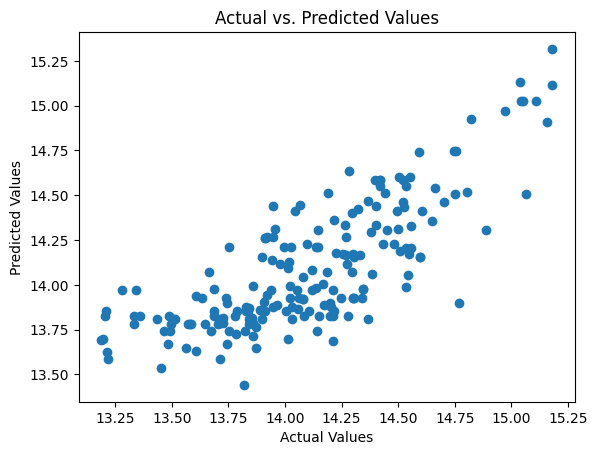

In [60]:
# 6, plot against predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

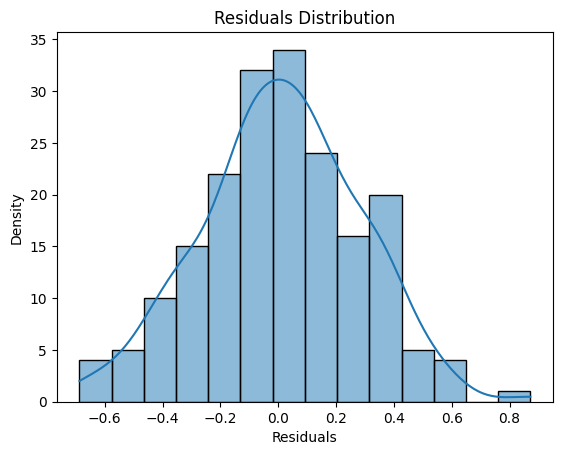

In [61]:
residuals = y_test - y_pred

sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

In [62]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
X = cars[['age_ihs', 'mileage_ihs', 'Seating_Capacity']]
y = cars['price_ihs'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X_variables, y, test_size=.2, random_state=100)

reg = DecisionTreeRegressor(max_depth=2, random_state=100)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R squared:", reg.score(X_test, y_test)) # R squared measure
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)


R squared: 0.4585662440186671
Root Mean Square Error (RMSE): 0.3216928182797294


In [63]:
reg = DecisionTreeRegressor(max_depth=5, random_state=100)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R squared:", reg.score(X_test, y_test)) # R squared measure
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)

R squared: 0.6083933877686668
Root Mean Square Error (RMSE): 0.27358589887613094


In [64]:
reg = DecisionTreeRegressor(max_depth=10, random_state=100)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R squared:", reg.score(X_test, y_test)) # R squared measure
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)

R squared: 0.6459633361595034
Root Mean Square Error (RMSE): 0.26013142559385205


In [65]:
reg = DecisionTreeRegressor(max_depth=15, random_state=100)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R squared:", reg.score(X_test, y_test)) # R squared measure
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)

R squared: 0.6306096319086896
Root Mean Square Error (RMSE): 0.26571219354425907


R squared: 0.6459633361595034
Root Mean Square Error (RMSE): 0.26013142559385205


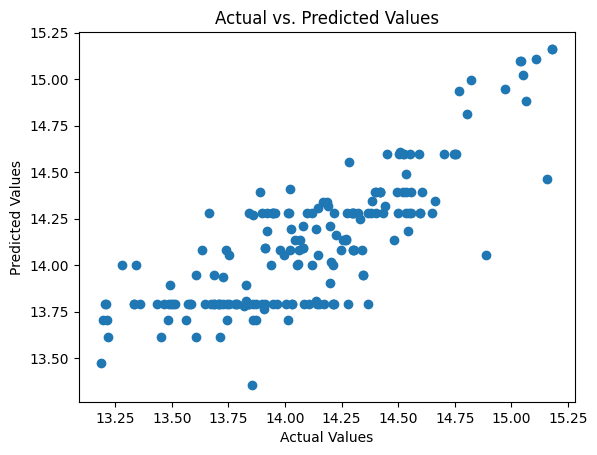

In [66]:
# 8
reg = DecisionTreeRegressor(max_depth=10, random_state=100)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R squared:", reg.score(X_test, y_test)) # R squared measure
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

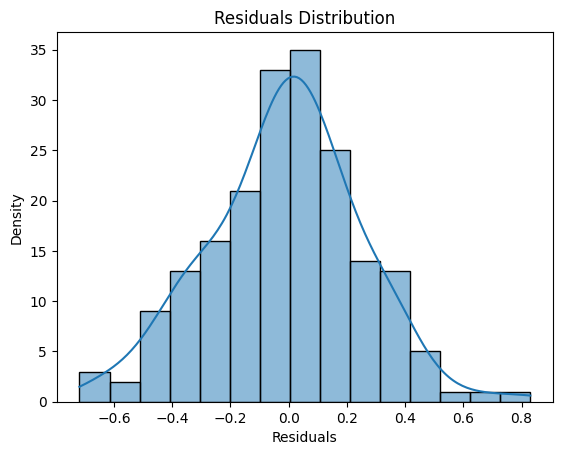

In [67]:
residuals = y_test - y_pred

sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

In [68]:
#1
!pip install pandas
import pandas as pd


In [71]:
df = pd.read_csv('/content/contraception_hw.csv')

df.describe()

,Unnamed: 0,age,edu,edu_spouse,numberChildren,religion,working,spouse_occupation,standardOfLivingIndex,mediaExposure,method
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,737.000000,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,425.362786,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,1.000000,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,369.000000,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,737.000000,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,1105.000000,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,1473.000000,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
# Replace values in the 'method' column with their corresponding categories
method_mapping = {1: "No Contraception", 3: "Short Term", 2: "Long Term"}
df['method'] = df['method'].map(method_mapping)

# Now, let's tabulate the 'method' variable.
method_counts = df['method'].value_counts()

# Cross-tabulate 'method' and 'numberChildren' variables.
cross_tab = pd.crosstab(df['method'], df['numberChildren'])

# Display the tabulated results
print("Method Variable Counts:")
print(method_counts)
print("\nCross-Tabulation of Method and numberChildren:")
print(cross_tab)

Method Variable Counts:
No Contraception    629
Short Term          511
Long Term           333
Name: method, dtype: int64

Cross-Tabulation of Method and numberChildren:
numberChildren    0    1    2    3   4   5   6   7   8   9   10  11  12  13  \
method                                                                        
Long Term          0   46   56   70  62  36  27  19   9   3   2   2   0   1   
No Contraception  95  143  114   70  57  44  35  18  29   5   9   6   4   0   
Short Term         2   87  106  119  78  55  30  12   9   8   0   3   0   1   

numberChildren    16  
method                
Long Term          0  
No Contraception   0  
Short Term         1  


In [73]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y)
X = df.drop(columns=['method'])
y = df['method']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




NameError: ignored

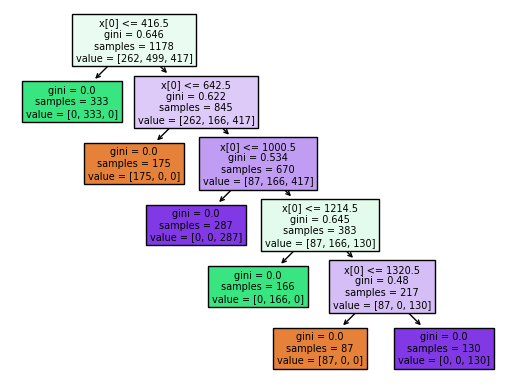

In [74]:
## Decision Trees sample code:
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth=10) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)

# Compute performance:
perf_cart = performance(y_test,y_hat_cart)
print(perf_cart)

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Define your features (X) and target variable (y)
X = df['age']
y = df['method']
# Assuming you have your data loaded into X (features) and y (target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a classification tree model
classification_tree = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
classification_tree.fit(X_train, y_train)

ValueError: ignored

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

In [76]:
!pip install pandas
import pandas as pd

In [77]:
df = pd.read_csv('/content/pretrial_data (1).csv')

df.describe()

,Unnamed: 0,age,is_poor,bond,bond_type,prior_F,prior_M,gini,released,sentence_type,sentence
count,22986.00000,22930.000000,21965.000000,16912.000000,22986.000000,22501.000000,22501.000000,22972.000000,22955.000000,22712.000000,22712.000000
mean,11492.50000,34.278020,0.476440,1464.159413,3.113330,1.375983,2.692991,0.440635,0.834415,1.815912,12.207737
std,6635.63098,12.466248,0.499456,2923.362046,1.866408,3.489802,4.438524,0.041939,0.371716,1.799287,50.725352
min,0.00000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.370000,0.000000,0.000000,0.000000
25%,5746.25000,24.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.420000,1.000000,0.000000,0.000000
50%,11492.50000,31.000000,0.000000,1000.000000,3.000000,0.000000,1.000000,0.430000,1.000000,1.000000,0.000000
75%,17238.75000,42.000000,1.000000,2500.000000,4.000000,1.000000,4.000000,0.470000,1.000000,4.000000,5.000000
max,22985.00000,100.000000,1.000000,160000.000000,9.000000,119.000000,74.000000,0.550000,1.000000,4.000000,2208.000000


In [79]:
df['is_black'] = (df['race'] == 'Black').astype(int)

In [80]:
import statsmodels.api as sm


# Add a constant term to the independent variable
X = sm.add_constant(df['is_black'])

# Define the dependent variable
y = df['held_wo_bail']

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

#What is the slope coefficient Interpret the coefficient on the Black dummy variable?
# 0.2590
# How much more likely is a black person to be held without bail? What is the  R2  of the model?
# The R squared value is 0 and a black person is 89 times more likely to be held without bail

                            OLS Regression Results                            
Dep. Variable:           held_wo_bail   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 09 Nov 2023   Prob (F-statistic):                nan
Time:                        22:02:43   Log-Likelihood:                -13644.
No. Observations:               22986   AIC:                         2.729e+04
Df Residuals:                   22985   BIC:                         2.730e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2590      0.003     89.628      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [81]:
import statsmodels.api as sm

df['is_black'] = (df['race'] == 'Black').astype(int)
df['is_female'] = (df['sex'] == 'F').astype(int)

# Add a constant term to the independent variables
X = sm.add_constant(df[['is_black', 'is_female']])

# Define the dependent variable
y = df['held_wo_bail']

# Fit a multiple regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           held_wo_bail   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     270.2
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           2.23e-60
Time:                        22:02:45   Log-Likelihood:                -13510.
No. Observations:               22986   AIC:                         2.702e+04
Df Residuals:                   22984   BIC:                         2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2883      0.003     85.260      0.0

In [88]:
import statsmodels.api as sm
df['is_black'] = (df['race'] == 'Black').astype(int)
df['is_female'] = (df['sex'] == 'F').astype(int)
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['is_poor'])
df['is_poor'] = df['is_poor'].astype(int)

# Add a constant term to the independent variables
X = sm.add_constant(df[['is_black', 'is_female', 'is_poor']])

# Define the dependent variable
y = df['held_wo_bail']

# Fit a multiple regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           held_wo_bail   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     660.1
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          5.49e-279
Time:                        22:08:00   Log-Likelihood:                -12317.
No. Observations:               21573   AIC:                         2.464e+04
Df Residuals:                   21570   BIC:                         2.466e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2051      0.004     46.872      0.0

In [89]:
import pandas as pd
import numpy as np
df['is_black'] = (df['race'] == 'Black').astype(int)
df['is_female'] = (df['sex'] == 'F').astype(int)
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['prior_M'])
df['is_poor'] = df['is_poor'].astype(int)
df['prior_M'] = df['prior_M'].astype(int)

# Add a constant term to the independent variables
X = sm.add_constant(df[['is_black', 'is_female', 'is_poor', 'prior_M']])

# Define the dependent variable
y = df['held_wo_bail']

# Fit a multiple regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           held_wo_bail   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     739.6
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:08:03   Log-Likelihood:                -11902.
No. Observations:               21573   AIC:                         2.381e+04
Df Residuals:                   21569   BIC:                         2.384e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1591      0.005     34.799      0.0

In [90]:
import pandas as pd
import numpy as np
df['is_black'] = (df['race'] == 'Black').astype(int)
df['is_female'] = (df['sex'] == 'F').astype(int)
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['prior_M'])
df['is_poor'] = df['is_poor'].astype(int)
df['prior_M'] = df['prior_M'].astype(int)
df['is_felony'] = (df['case_type'] == 'F').astype(int)

# Add a constant term to the independent variables
X = sm.add_constant(df[['is_black', 'is_female', 'is_poor', 'prior_M', 'is_felony']])

# Define the dependent variable
y = df['held_wo_bail']

# Fit a multiple regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           held_wo_bail   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     1792.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:08:06   Log-Likelihood:                -9862.9
No. Observations:               21573   AIC:                         1.974e+04
Df Residuals:                   21568   BIC:                         1.978e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0798      0.004     18.443      0.0

In [97]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Create interaction terms between 'Black' and 'sex'
df['Black_sex_interaction'] = df['is_black'] * df['is_female']

# Add a constant term to the independent variables
X = sm.add_constant(df[['is_black', 'is_female', 'Black_sex_interaction']])

# Define the dependent variable
y = df['held_wo_bail']

# Fit a regression model with interaction terms
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           held_wo_bail   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     247.1
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           2.25e-55
Time:                        22:13:32   Log-Likelihood:                -12835.
No. Observations:               21573   AIC:                         2.567e+04
Df Residuals:                   21571   BIC:                         2.569e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
